## UN Data Exploration

#### Q1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

#### Q2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

#### Q3. In the first cell of your notebook, import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Q4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [ ]:
gdp_df.head(10)

In [ ]:
gdp_df.tail(10)

#### Q5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = (
    gdp_df
    .drop(columns=['Value Footnotes'])
    .rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
)

#### Q6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [7]:
print(f'The DataFrame has {gdp_df.shape[0]} rows and {gdp_df.shape[1]} columns')

The DataFrame has 7662 rows and 3 columns


In [ ]:
gdp_df.dtypes

#### Q7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

1990 - 2022  
The number of observations per year seems to gradually increase over time.

In [ ]:
gdp_df['Year'].value_counts().sort_index(ascending=False)

#### Q8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [10]:
print(f'There are {gdp_df['Country'].nunique()} countries/regions represented in the data set.')

There are 242 countries/regions represented in the data set.


Djibouti and Somalia have the fewest entries; they didn't start reporting or tracking until 2013.

In [ ]:
gdp_df['Country'].value_counts().tail(2)

#### Q9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021

In [12]:
gdp_2021 = gdp_df[gdp_df['Year'] == 2021]

#### Q10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [14]:
gdp_2021['GDP_Per_Capita'].describe()

count       241.000000
mean      20711.570080
std       20916.978968
min         714.066712
25%        5044.196028
50%       13754.802423
75%       30974.370692
max      115683.493708
Name: GDP_Per_Capita, dtype: float64

#### Q11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

The distribution is heavily right-skewed, with most countries/regions at or below a GDP per Capita of 20K.

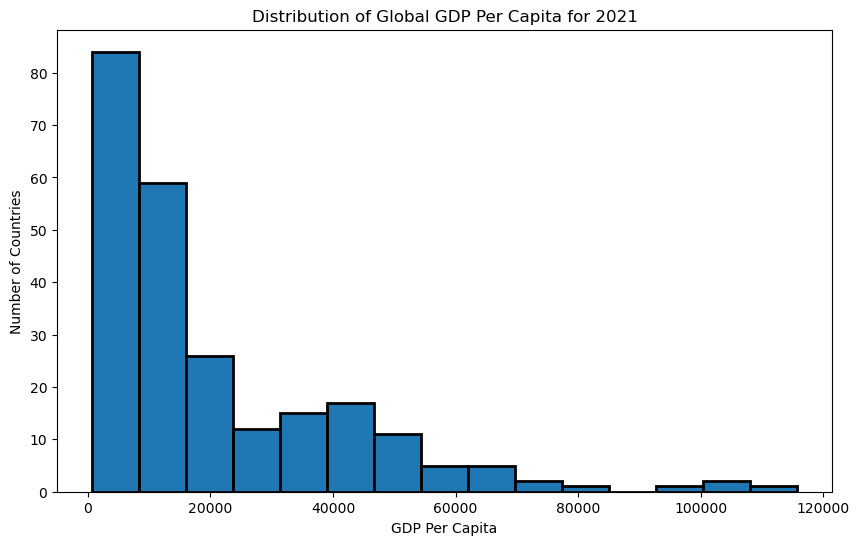

In [16]:
fig,ax = plt.subplots(figsize = (10,6))
plt.hist(
    data=gdp_2021,
    x='GDP_Per_Capita',
    edgecolor='Black',
    linewidth=2,
    bins = 15
    );
plt.xlabel('GDP Per Capita')                            
plt.ylabel('Number of Countries')
plt.title('Distribution of Global GDP Per Capita for 2021');

#### Q12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [18]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515
...,...,...,...
5073,Niger,2021,1186.576809
6272,Somalia,2021,1136.735989
1629,Dem. Rep. Congo,2021,1073.643271
1216,Central African Republic,2021,837.504686


#### Q13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [20]:
gdp_pivoted = (
    gdp_df
    [gdp_df['Year'].isin([1990, 2001])]
    .pivot_table(index='Country', values='GDP_Per_Capita', columns='Year')
    .dropna()
)

Year,1990,2001
Country,,
Africa Eastern and Southern,3037.297466,2928.062946
Africa Western and Central,2788.301039,2734.257633
Albania,4827.027705,6441.440698
Algeria,8828.874473,8926.110134
Angola,5793.084512,4768.008894
...,...,...
Vanuatu,2774.138350,2782.053642
Viet Nam,2099.394649,3879.338958
World,9705.981267,11221.662910


#### Q14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [24]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2001] - gdp_pivoted[1990]) / gdp_pivoted[1990]

Year,1990,2001,Percent_Change
Country,,,
Africa Eastern and Southern,3037.297466,2928.062946,-3.596438
Africa Western and Central,2788.301039,2734.257633,-1.938220
Albania,4827.027705,6441.440698,33.445281
Algeria,8828.874473,8926.110134,1.101337
Angola,5793.084512,4768.008894,-17.694816
...,...,...,...
Vanuatu,2774.138350,2782.053642,0.285324
Viet Nam,2099.394649,3879.338958,84.783693
World,9705.981267,11221.662910,15.615955


#### Q15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [26]:
print(f'{(gdp_pivoted['Percent_Change'] < 0).sum()} countries experienced a negative percent change in GDP per capita from 1990 to 2001')

56 countries experienced a negative percent change in GDP per capita from 1990 to 2001


#### Q16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

In [130]:
gdp_pivoted.nlargest(2, 'Percent_Change')

Year,1990,2001,Percent_Change
Country,,,
Equatorial Guinea,936.419751,15389.155994,1543.403611
China,1423.896348,3712.338132,160.716880


In [124]:
#just having a bit of dumb fun with f-strings
print(f'The countries with the highest percent change in GDP per capita are {gdp_pivoted.nlargest(2, 'Percent_Change').reset_index()['Country'][0]} with {gdp_pivoted.nlargest(2, 'Percent_Change').reset_index()['Percent_Change'][0]}% and {gdp_pivoted.nlargest(2, 'Percent_Change').reset_index()['Country'][1]} with {gdp_pivoted.nlargest(2, 'Percent_Change').reset_index()['Percent_Change'][1]}%.')

The countries with the highest percent change in GDP per capita are Equatorial Guinea with 1543.403610690951% and China with 160.71687997495076%.


EG GDP per capita has a meteoric rise until about 2009, at which point it begins to trends downward; whereas China trends upward more gradually

#### Q16 Bonus: Put both line charts on the same plot.

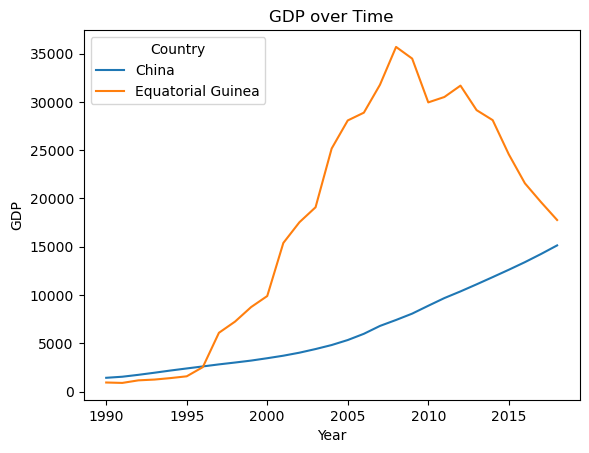

In [211]:
gdp_top2 = gdp_pivoted.nlargest(2, 'Percent_Change').reset_index()
gdp_top2 = gdp_df[gdp_df['Country'].isin(gdp_top2['Country'])]
gdp_top2 = gdp_top2[gdp_top2['Year'] < 2019]
gdp_top2.pivot(values = "GDP_Per_Capita", index = 'Year', columns = 'Country').plot()
plt.title('GDP over Time')
plt.ylabel('GDP');

#### Q17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [215]:
continents = pd.read_csv('../data/continents.csv')

#### Q18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [217]:
gdp_df = pd.merge(gdp_df, continents, on = 'Country', how = 'inner', validate='many_to_one')

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5888,Zimbabwe,1994,2670.106615,Africa
5889,Zimbabwe,1993,2458.783255,Africa
5890,Zimbabwe,1992,2468.278257,Africa
5891,Zimbabwe,1991,2781.787843,Africa


#### Q19. Determine the number of countries per continent. Create a bar chart showing this.

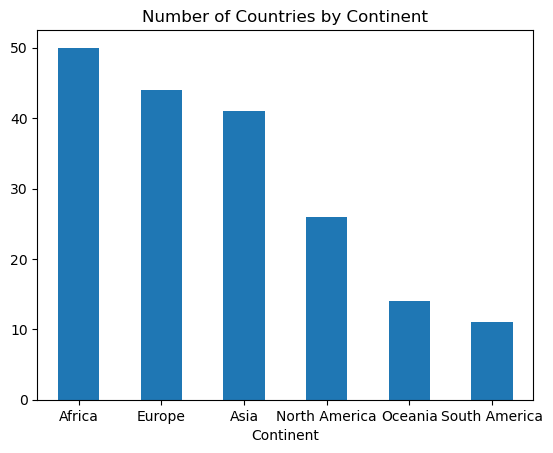

In [221]:
gdp_df.drop_duplicates('Country')['Continent'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Number of Countries by Continent');

#### Q20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

Europe and Asia have a lot more variability, and a couple of pretty extreme outliers; Africa, despite having more countries that any other continent has very little variability, and is also at the lower end for GDP per capita

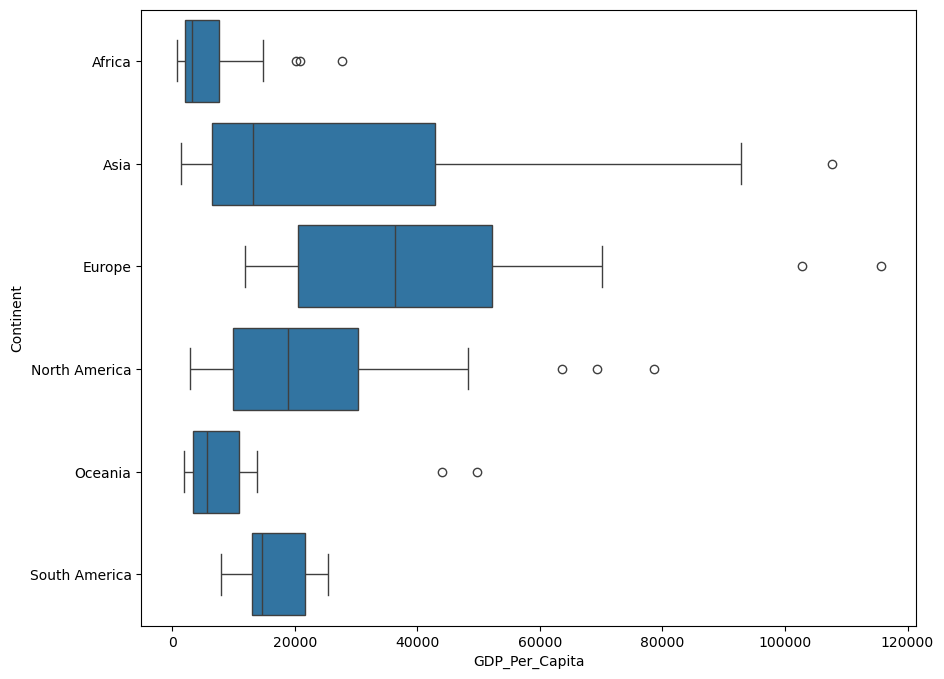

In [223]:
plt.figure(figsize = (10,8))
sns.boxplot(data = gdp_df.loc[gdp_df['Year'] == 2021].sort_values('Continent'), x = 'GDP_Per_Capita', y ='Continent');

#### Q21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.


In [243]:
#skiprows argument added to skip over 'header' rows that were messing up the parsing of the dataset
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv', skiprows=4)

#### Q22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [245]:
life_expectancy = (
    life_expectancy
    .drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
    .melt(id_vars = 'Country Name', var_name = 'Year', value_name = 'Life Expectancy')
    .rename(columns={'Country Name': 'Country'})
)

In [ ]:
life_expectancy = life_expectancy.dropna()

#### Q23. What was the first country with a life expectancy to exceed 80?

In [297]:
print(f'The first country to exceed a life expectancy of 80 was {life_expectancy[life_expectancy['Life Expectancy'] >= 80].reset_index()['Country'][0]} in {life_expectancy[life_expectancy['Life Expectancy'] >= 80].reset_index()['Year'][0]}.')

The first country to exceed a life expectancy of 80 was Japan in 1996.


#### Q24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [299]:
life_expectancy['Year'] = life_expectancy['Year'].astype(int)
gdp_le = pd.merge(gdp_df, life_expectancy, on = ['Country', 'Year'] , how = 'inner', validate='one_to_one')

C:\Users\Maria\AppData\Local\Temp\ipykernel_6792\3582797379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_expectancy['Year'] = life_expectancy['Year'].astype(int)


,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


#### Q25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

31

In [301]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


In [303]:
print(f'{(gdp_le_2021['Life Expectancy'] >=80).sum()} countries have a life expectancy of at least 80 in 2021.')

31 countries have a life expectancy of at least 80 in 2021.


#### Q26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

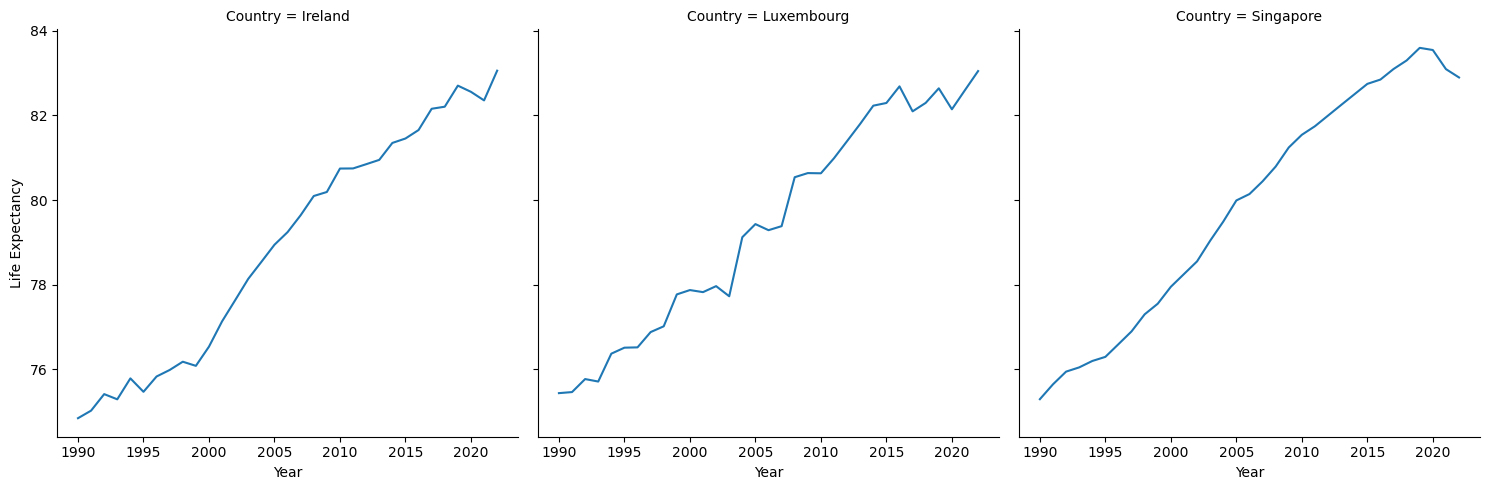

In [307]:
top_3_gdp = gdp_le_2021.nlargest(3, 'GDP_Per_Capita')['Country']
sns.relplot(
    data = gdp_le[gdp_le['Country'].isin(top_3_gdp)], x='Year', y='Life Expectancy',
    col='Country',
    kind='line'
)

#### Q27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

It appears that there is a positive correlation between life expectancy and GDP per capita, so as one increases, so does the other.
But it would also appear that if one were to draw a line, it would be more curved than straight, looking more like an exponential/logarithmic function?

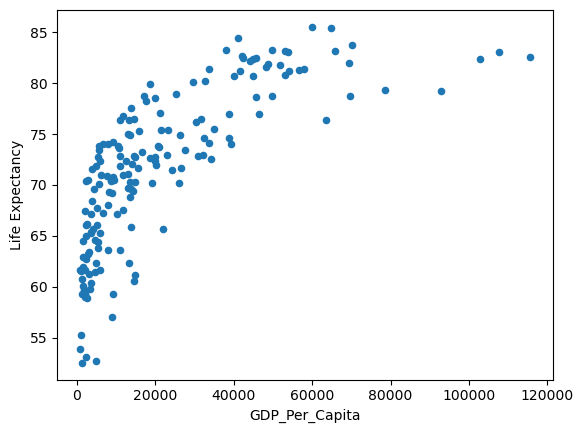

In [309]:
gdp_le_2021.plot(
    kind="scatter",
    y="Life Expectancy",
    x="GDP_Per_Capita"
);

#### Q28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

Corr coeff = 0.745; this would suggest that there is a fairly strong relationship between the two variables (i.e. how likely knowing one can help us predict the other)

In [311]:
gdp_le_2021[['Life Expectancy', 'GDP_Per_Capita']].corr()

,Life Expectancy,GDP_Per_Capita
Life Expectancy,1.000000,0.745081
GDP_Per_Capita,0.745081,1.000000


#### Q29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

The scatterplot looks far more linear after using the Log10 values for GDP per capita.

In [313]:
gdp_le_2021['Log10 GDP_Per_Capita'] = np.log10(gdp_le_2021['GDP_Per_Capita'])

C:\Users\Maria\AppData\Local\Temp\ipykernel_6792\2089150054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['Log10 GDP_Per_Capita'] = np.log10(gdp_le_2021['GDP_Per_Capita'])


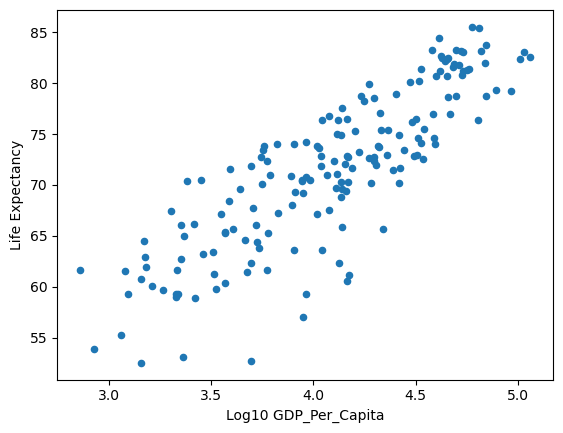

In [315]:
gdp_le_2021.plot(
    kind="scatter",
    y="Life Expectancy",
    x="Log10 GDP_Per_Capita"
);